In [1]:
import numpy as np
import sys

import run_utils

sys.path.append('../') 

from reclab.recommenders import LibFM
from reclab import data_utils

# ML 100k

loading and tuning


In [2]:
users, items, ratings = data_utils.read_dataset('ml-100k')

default_params = dict(num_two_way_factors=32, learning_rate=0.1,
              bias_reg=0., one_way_reg=0., two_way_reg=0., 
              num_iter=100)

tuner = run_utils.ModelTuner((users, items, ratings), default_params,
                             n_fold=5, verbose=True)

In [3]:
regs = [0.01, 0.1, 0.5]
sss = [0.1, 0.05, 0.01, 0.005]

params_list = [('reg={},ss={}'.format(reg, ss), dict(bias_reg=reg, one_way_reg=reg, two_way_reg=reg, 
                                                     learning_rate=ss)) for reg in regs for ss in sss]

res_dict = tuner.evaluate_list(params_list)

Evaluating: {'bias_reg': 0.01, 'one_way_reg': 0.01, 'two_way_reg': 0.01, 'learning_rate': 0.1}
Fold 1/5, mse=1.6129939288052795
Fold 2/5, mse=1.5698445700262185
Fold 3/5, mse=1.6360906188266382
Fold 4/5, mse=1.592378409724719
Fold 5/5, mse=1.5855963847549182
Average MSE: 1.5993807824275548
Evaluating: {'bias_reg': 0.01, 'one_way_reg': 0.01, 'two_way_reg': 0.01, 'learning_rate': 0.05}
Fold 1/5, mse=1.4298636813965808
Fold 2/5, mse=1.3854496071580567
Fold 3/5, mse=1.4323630796245608
Fold 4/5, mse=1.4599172406834153
Fold 5/5, mse=1.4753955300202142
Average MSE: 1.4365978277765656
Evaluating: {'bias_reg': 0.01, 'one_way_reg': 0.01, 'two_way_reg': 0.01, 'learning_rate': 0.01}
Fold 1/5, mse=1.245218068886789
Fold 2/5, mse=1.205741556626909
Fold 3/5, mse=1.2472359511277094
Fold 4/5, mse=1.2442533299953225
Fold 5/5, mse=1.244059721376039
Average MSE: 1.2373017256025538
Evaluating: {'bias_reg': 0.01, 'one_way_reg': 0.01, 'two_way_reg': 0.01, 'learning_rate': 0.005}
Fold 1/5, mse=1.1298337601471

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

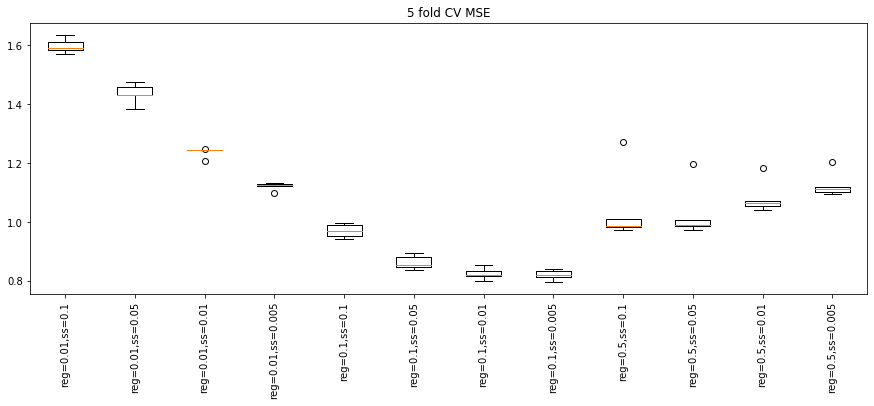

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,5])
plt.title("5 fold CV MSE")
plt.boxplot(res_dict.values(), labels=res_dict.keys());
plt.xticks(rotation=90) 

In [11]:
dims = [8, 16, 32, 56, 128, 256]
params_list = [('dim={}'.format(k), dict(bias_reg=0.1, one_way_reg=0.1, two_way_reg=0.1, 
                                         learning_rate=0.005, num_two_way_factors=k)) for k in dims]

res_dict = tuner.evaluate_list(params_list)

Evaluating: {'bias_reg': 0.1, 'one_way_reg': 0.1, 'two_way_reg': 0.1, 'learning_rate': 0.005, 'num_two_way_factors': 8}
Fold 1/5, mse=0.8642756163705609
Fold 2/5, mse=0.8530917296032209
Fold 3/5, mse=0.8379744207027668
Fold 4/5, mse=0.8432846551603826
Fold 5/5, mse=0.8197650316707888
Average MSE: 0.843678290701544
Evaluating: {'bias_reg': 0.1, 'one_way_reg': 0.1, 'two_way_reg': 0.1, 'learning_rate': 0.005, 'num_two_way_factors': 16}
Fold 1/5, mse=0.8606387026644754
Fold 2/5, mse=0.850357727390412
Fold 3/5, mse=0.8387158031762189
Fold 4/5, mse=0.838599096338516
Fold 5/5, mse=0.8160730047719573
Average MSE: 0.8408768668683159
Evaluating: {'bias_reg': 0.1, 'one_way_reg': 0.1, 'two_way_reg': 0.1, 'learning_rate': 0.005, 'num_two_way_factors': 32}
Fold 1/5, mse=0.8591696322279365
Fold 2/5, mse=0.8471232670026164
Fold 3/5, mse=0.8375817944600631
Fold 4/5, mse=0.8404724286163197
Fold 5/5, mse=0.8105690942841294
Average MSE: 0.8389832433182131
Evaluating: {'bias_reg': 0.1, 'one_way_reg': 0.1, 

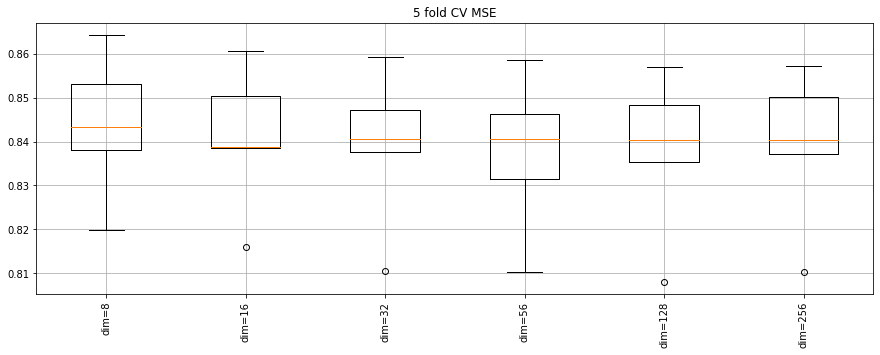

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,5])
plt.title("5 fold CV MSE")
plt.boxplot(res_dict.values(), labels=res_dict.keys());
plt.xticks(rotation=90) 
plt.grid()

# ML 10M

no need to tune model since previous work has determined best settings

In [17]:
datafile = '~/recsys/recsys-eval/data/ml-10M100K/ratings.dat'

In [6]:
users, items, ratings = data_utils.read_dataset('ml-10m')


In [10]:
len(items)

10677

# Citeulike-a

TODO: current setting can just predict 1 for ever item! We need more specialized implicit rating methods which are not included in libfm

In [6]:
users, items, ratings = data_utils.read_dataset('citeulike-a')

print(len(ratings))
print(len(np.unique(ratings)))


199435
1


In [7]:
len(ratings)/ (len(users) * len(items))

0.0021168843249956596

# Pinterest

TODO: current setting can just predict 1 for ever item! We need more specialized implicit rating methods which are not included in libfm

# LastFM

In [17]:
users, items, ratings = data_utils.read_dataset('lastfm', shuffle=True)

In [18]:
len(users)

992

In [19]:
len(items)

177023

In [20]:
len(ratings)

904625